# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

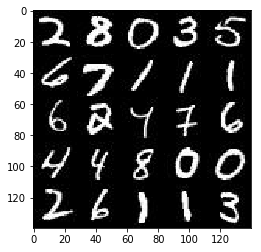

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

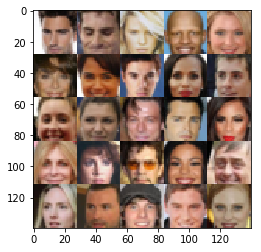

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.8.0
Default GPU Device: /device:GPU:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    inp_imgs = tf.placeholder(tf.float32,shape=(None,image_width,image_height,image_channels),name='input_tensor')
    z = tf.placeholder(tf.float32,shape=(None,z_dim),name='z')
    lt = tf.placeholder(tf.float32,name='learning_rate')

    return inp_imgs, z, lt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
tf.layers.batch_normalization?

In [7]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha=0.2
    
    with tf.variable_scope('discriminator',reuse=reuse):
        layer = tf.layers.conv2d(images,64,5,strides=2,padding='same')
        layer = tf.nn.leaky_relu(layer,alpha=alpha)

        layer = tf.layers.conv2d(layer,128,5,strides=2,padding='same')
        layer = tf.nn.leaky_relu(tf.layers.batch_normalization(layer,True),alpha=alpha)

        layer = tf.layers.conv2d(layer,256,5,strides=2,padding='same')
        layer = tf.nn.leaky_relu(tf.layers.batch_normalization(layer,True),alpha=alpha)
        
        layer = tf.layers.conv2d(layer,512,5,strides=2,padding='same')
        layer = tf.nn.leaky_relu(tf.layers.batch_normalization(layer,True),alpha=alpha)

        layer = tf.reshape(layer,shape=[-1,2*2*512])
        logits = tf.layers.dense(layer,1)
        out = tf.nn.sigmoid(logits)
        

    return out,logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [28]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    alpha = 0.2
    with tf.variable_scope('generator',reuse=not is_train):
        
        """
        Note to reviewer:
        Since the images are scaled to [-0.5,0.5], I found that multiplying the network output by 0.5 generates which
        are much less fuzzy and trains much faster (Although it's just one less parameter to learn, It seems more natural
        to me to incorporate this prior knowledge into the network, instead of letting it learn it by itself)
        """
        scaler = tf.constant(0.5,dtype=tf.float32,shape=None)
        layer = tf.layers.dense(z,4*4*512)
        layer = tf.reshape(layer,(-1,4,4,512))
        layer = tf.nn.leaky_relu(tf.layers.batch_normalization(layer,training=is_train),alpha=alpha)
        
        layer = tf.layers.conv2d_transpose(layer,256,4,strides=(1,1),padding='valid')
        layer = tf.nn.leaky_relu(tf.layers.batch_normalization(layer,training=is_train),alpha=alpha)
        
        layer = tf.layers.conv2d_transpose(layer,128,4,strides=(1,1),padding='same')
        layer = tf.nn.leaky_relu(tf.layers.batch_normalization(layer,training=is_train),alpha=alpha)
        
        layer = tf.layers.conv2d_transpose(layer,64,4,strides=(2,2),padding='same')
        layer = tf.nn.leaky_relu(tf.layers.batch_normalization(layer,training=is_train),alpha=alpha)
                
        logits = tf.layers.conv2d_transpose(layer,out_channel_dim,5,strides=(2,2),padding='same')
        
        out = tf.scalar_mul(scaler,tf.tanh(logits))
    
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [29]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    
    d_loss = d_loss_real + d_loss_fake
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [30]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [31]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})
    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [32]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    inputs, z, lt = model_inputs(data_shape[1],data_shape[2],data_shape[3],z_dim)
    d_loss, g_loss = model_loss(inputs, z, data_shape[3])
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, lt, beta1)
    losses = []
    saver = tf.train.Saver()
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_num, batch_images in enumerate(get_batches(batch_size)):
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                _ = sess.run(d_train_opt, feed_dict={inputs:batch_images,z:batch_z,lt:learning_rate})
                _ = sess.run(g_train_opt, feed_dict={inputs:batch_images,z:batch_z,lt:learning_rate})
                
                if batch_num % 10 == 0:
                    train_loss_d = d_loss.eval({z: batch_z, inputs: batch_images})
                    train_loss_g = g_loss.eval({z: batch_z})
                    
                    print("Epoch {}/{}...".format(epoch_i, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    losses.append((train_loss_d, train_loss_g))
                if batch_num % 100 == 0:
                    show_generator_output(sess,9, z, data_shape[3], data_image_mode)
        show_generator_output(sess,9, z, data_shape[3], data_image_mode)
        saver.save(sess, './checkpoints/generator.ckpt')
    

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 0/2... Discriminator Loss: 1.3326... Generator Loss: 0.6767


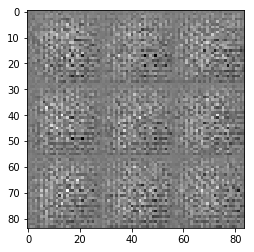

Epoch 0/2... Discriminator Loss: 1.0661... Generator Loss: 0.4357
Epoch 0/2... Discriminator Loss: 0.9737... Generator Loss: 0.8283
Epoch 0/2... Discriminator Loss: 0.9864... Generator Loss: 1.0617
Epoch 0/2... Discriminator Loss: 1.3386... Generator Loss: 2.0768
Epoch 0/2... Discriminator Loss: 0.8782... Generator Loss: 0.9260
Epoch 0/2... Discriminator Loss: 0.6862... Generator Loss: 1.1449
Epoch 0/2... Discriminator Loss: 4.2879... Generator Loss: 5.2668
Epoch 0/2... Discriminator Loss: 0.8911... Generator Loss: 0.8984
Epoch 0/2... Discriminator Loss: 0.5580... Generator Loss: 1.6423
Epoch 0/2... Discriminator Loss: 0.8721... Generator Loss: 1.2454


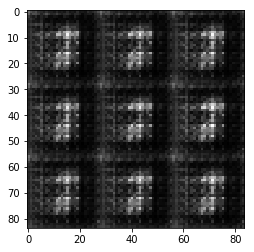

Epoch 0/2... Discriminator Loss: 0.2692... Generator Loss: 2.0173
Epoch 0/2... Discriminator Loss: 1.8729... Generator Loss: 3.7274
Epoch 0/2... Discriminator Loss: 0.6812... Generator Loss: 1.3060
Epoch 0/2... Discriminator Loss: 1.0286... Generator Loss: 0.6500
Epoch 0/2... Discriminator Loss: 0.5609... Generator Loss: 1.1544
Epoch 0/2... Discriminator Loss: 0.8277... Generator Loss: 2.3089
Epoch 0/2... Discriminator Loss: 1.0764... Generator Loss: 1.0232
Epoch 0/2... Discriminator Loss: 1.4748... Generator Loss: 1.0585
Epoch 0/2... Discriminator Loss: 1.2997... Generator Loss: 0.6352
Epoch 0/2... Discriminator Loss: 1.2729... Generator Loss: 1.4257


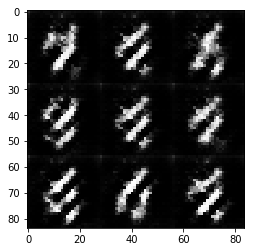

Epoch 0/2... Discriminator Loss: 0.6994... Generator Loss: 1.1950
Epoch 0/2... Discriminator Loss: 1.2023... Generator Loss: 1.4630
Epoch 0/2... Discriminator Loss: 0.7686... Generator Loss: 1.0562
Epoch 0/2... Discriminator Loss: 0.8450... Generator Loss: 1.4514
Epoch 0/2... Discriminator Loss: 0.8036... Generator Loss: 1.3687
Epoch 0/2... Discriminator Loss: 1.4796... Generator Loss: 0.3797
Epoch 0/2... Discriminator Loss: 0.9983... Generator Loss: 1.0857
Epoch 0/2... Discriminator Loss: 0.9016... Generator Loss: 0.6499
Epoch 0/2... Discriminator Loss: 1.0300... Generator Loss: 1.2674
Epoch 0/2... Discriminator Loss: 0.7386... Generator Loss: 1.6639


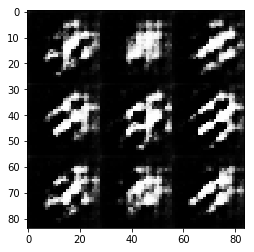

Epoch 0/2... Discriminator Loss: 1.2007... Generator Loss: 0.7582
Epoch 0/2... Discriminator Loss: 0.6903... Generator Loss: 1.3366
Epoch 0/2... Discriminator Loss: 1.3188... Generator Loss: 0.9757
Epoch 0/2... Discriminator Loss: 0.5583... Generator Loss: 1.8456
Epoch 0/2... Discriminator Loss: 1.6007... Generator Loss: 0.3988
Epoch 0/2... Discriminator Loss: 1.4692... Generator Loss: 1.5570
Epoch 0/2... Discriminator Loss: 0.8247... Generator Loss: 1.2483
Epoch 0/2... Discriminator Loss: 0.9025... Generator Loss: 0.8933
Epoch 0/2... Discriminator Loss: 0.8470... Generator Loss: 1.1478
Epoch 0/2... Discriminator Loss: 0.9138... Generator Loss: 0.8928


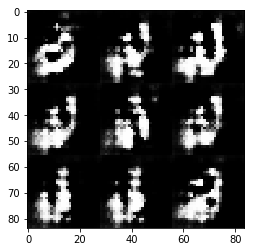

Epoch 0/2... Discriminator Loss: 1.2715... Generator Loss: 0.5742
Epoch 0/2... Discriminator Loss: 0.9580... Generator Loss: 1.5971
Epoch 0/2... Discriminator Loss: 1.0744... Generator Loss: 0.9094
Epoch 0/2... Discriminator Loss: 1.1436... Generator Loss: 1.9270
Epoch 0/2... Discriminator Loss: 0.9099... Generator Loss: 0.7406
Epoch 0/2... Discriminator Loss: 0.3607... Generator Loss: 1.7758
Epoch 0/2... Discriminator Loss: 1.3924... Generator Loss: 1.7267
Epoch 0/2... Discriminator Loss: 0.8089... Generator Loss: 1.5238
Epoch 0/2... Discriminator Loss: 0.5010... Generator Loss: 1.4110
Epoch 0/2... Discriminator Loss: 1.0203... Generator Loss: 2.8585


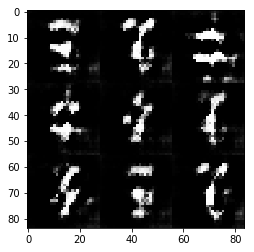

Epoch 0/2... Discriminator Loss: 0.7656... Generator Loss: 1.7423
Epoch 0/2... Discriminator Loss: 1.6467... Generator Loss: 0.9744
Epoch 0/2... Discriminator Loss: 0.6893... Generator Loss: 1.1758
Epoch 0/2... Discriminator Loss: 1.5362... Generator Loss: 1.2574
Epoch 0/2... Discriminator Loss: 0.9586... Generator Loss: 1.1621
Epoch 0/2... Discriminator Loss: 1.1719... Generator Loss: 1.3436
Epoch 0/2... Discriminator Loss: 1.1505... Generator Loss: 1.9915
Epoch 0/2... Discriminator Loss: 0.9616... Generator Loss: 1.2419
Epoch 0/2... Discriminator Loss: 0.7841... Generator Loss: 1.3526
Epoch 0/2... Discriminator Loss: 1.5018... Generator Loss: 0.6996


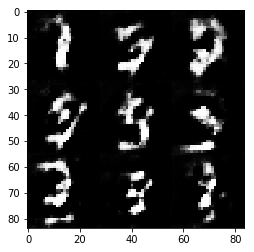

Epoch 0/2... Discriminator Loss: 0.7311... Generator Loss: 1.3312
Epoch 0/2... Discriminator Loss: 0.9227... Generator Loss: 1.5779
Epoch 0/2... Discriminator Loss: 0.9077... Generator Loss: 1.2697
Epoch 0/2... Discriminator Loss: 0.7988... Generator Loss: 1.4612
Epoch 0/2... Discriminator Loss: 1.2664... Generator Loss: 0.8572
Epoch 0/2... Discriminator Loss: 1.0760... Generator Loss: 0.7842
Epoch 0/2... Discriminator Loss: 1.1439... Generator Loss: 1.2491
Epoch 0/2... Discriminator Loss: 0.8759... Generator Loss: 1.0479
Epoch 0/2... Discriminator Loss: 1.0371... Generator Loss: 0.9230
Epoch 0/2... Discriminator Loss: 1.2065... Generator Loss: 0.8983


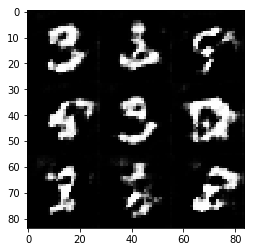

Epoch 0/2... Discriminator Loss: 1.2003... Generator Loss: 0.8825
Epoch 0/2... Discriminator Loss: 0.8527... Generator Loss: 1.2289
Epoch 0/2... Discriminator Loss: 0.9991... Generator Loss: 0.9031
Epoch 0/2... Discriminator Loss: 0.9760... Generator Loss: 0.9695
Epoch 0/2... Discriminator Loss: 1.3803... Generator Loss: 0.9117
Epoch 0/2... Discriminator Loss: 1.0666... Generator Loss: 1.3684
Epoch 0/2... Discriminator Loss: 0.8047... Generator Loss: 1.3580
Epoch 0/2... Discriminator Loss: 1.2260... Generator Loss: 1.5038
Epoch 0/2... Discriminator Loss: 0.9754... Generator Loss: 0.9940
Epoch 0/2... Discriminator Loss: 1.2101... Generator Loss: 0.9227


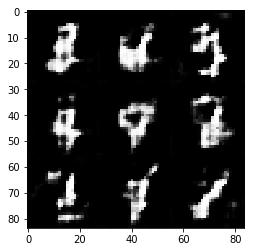

Epoch 0/2... Discriminator Loss: 1.5412... Generator Loss: 0.9943
Epoch 0/2... Discriminator Loss: 0.9448... Generator Loss: 0.8445
Epoch 0/2... Discriminator Loss: 1.3373... Generator Loss: 1.7800
Epoch 0/2... Discriminator Loss: 1.1230... Generator Loss: 1.0341
Epoch 0/2... Discriminator Loss: 1.2818... Generator Loss: 1.1783
Epoch 0/2... Discriminator Loss: 1.3410... Generator Loss: 0.8564
Epoch 0/2... Discriminator Loss: 1.0408... Generator Loss: 1.1035
Epoch 0/2... Discriminator Loss: 1.0339... Generator Loss: 0.8101
Epoch 0/2... Discriminator Loss: 0.9703... Generator Loss: 1.1621
Epoch 0/2... Discriminator Loss: 1.2276... Generator Loss: 0.6272


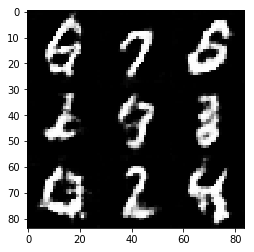

Epoch 0/2... Discriminator Loss: 1.0350... Generator Loss: 0.8231
Epoch 0/2... Discriminator Loss: 1.0593... Generator Loss: 1.2818
Epoch 0/2... Discriminator Loss: 1.1167... Generator Loss: 0.7977
Epoch 1/2... Discriminator Loss: 1.0413... Generator Loss: 0.9963


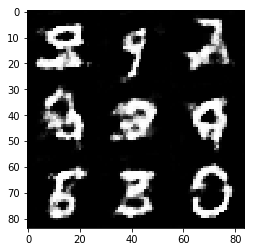

Epoch 1/2... Discriminator Loss: 1.1152... Generator Loss: 0.8432
Epoch 1/2... Discriminator Loss: 1.1162... Generator Loss: 0.7689
Epoch 1/2... Discriminator Loss: 1.2303... Generator Loss: 0.6455
Epoch 1/2... Discriminator Loss: 1.1045... Generator Loss: 0.7858
Epoch 1/2... Discriminator Loss: 1.3079... Generator Loss: 0.6694
Epoch 1/2... Discriminator Loss: 1.1040... Generator Loss: 0.9545
Epoch 1/2... Discriminator Loss: 1.3106... Generator Loss: 0.5989
Epoch 1/2... Discriminator Loss: 1.1852... Generator Loss: 0.7943
Epoch 1/2... Discriminator Loss: 1.1637... Generator Loss: 0.9500
Epoch 1/2... Discriminator Loss: 1.0233... Generator Loss: 1.0827


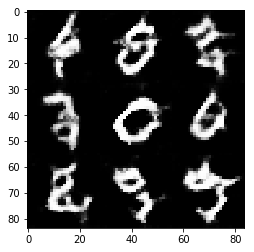

Epoch 1/2... Discriminator Loss: 1.1640... Generator Loss: 1.3062
Epoch 1/2... Discriminator Loss: 1.1637... Generator Loss: 0.9416
Epoch 1/2... Discriminator Loss: 1.1439... Generator Loss: 1.3338
Epoch 1/2... Discriminator Loss: 1.3111... Generator Loss: 1.0242
Epoch 1/2... Discriminator Loss: 1.0522... Generator Loss: 0.7640
Epoch 1/2... Discriminator Loss: 1.1238... Generator Loss: 0.7637
Epoch 1/2... Discriminator Loss: 1.1276... Generator Loss: 1.1050
Epoch 1/2... Discriminator Loss: 1.1093... Generator Loss: 1.1960
Epoch 1/2... Discriminator Loss: 1.2173... Generator Loss: 0.9318
Epoch 1/2... Discriminator Loss: 1.3441... Generator Loss: 1.3072


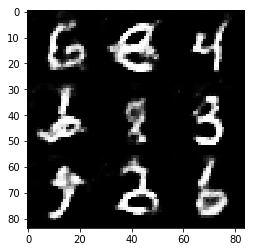

Epoch 1/2... Discriminator Loss: 1.3270... Generator Loss: 0.7700
Epoch 1/2... Discriminator Loss: 0.9465... Generator Loss: 1.0822
Epoch 1/2... Discriminator Loss: 1.1381... Generator Loss: 0.9026
Epoch 1/2... Discriminator Loss: 0.9344... Generator Loss: 1.1031
Epoch 1/2... Discriminator Loss: 1.0498... Generator Loss: 1.1475
Epoch 1/2... Discriminator Loss: 1.4984... Generator Loss: 0.5015
Epoch 1/2... Discriminator Loss: 1.1143... Generator Loss: 0.7199
Epoch 1/2... Discriminator Loss: 1.0537... Generator Loss: 0.8776
Epoch 1/2... Discriminator Loss: 1.1917... Generator Loss: 1.2488
Epoch 1/2... Discriminator Loss: 1.1248... Generator Loss: 0.8056


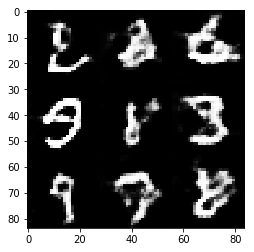

Epoch 1/2... Discriminator Loss: 1.1463... Generator Loss: 0.8598
Epoch 1/2... Discriminator Loss: 0.9524... Generator Loss: 1.2923
Epoch 1/2... Discriminator Loss: 1.1599... Generator Loss: 1.2031
Epoch 1/2... Discriminator Loss: 1.3167... Generator Loss: 1.0155
Epoch 1/2... Discriminator Loss: 1.2050... Generator Loss: 0.8495
Epoch 1/2... Discriminator Loss: 1.1120... Generator Loss: 1.0468
Epoch 1/2... Discriminator Loss: 0.9293... Generator Loss: 0.9616
Epoch 1/2... Discriminator Loss: 1.3223... Generator Loss: 0.7074
Epoch 1/2... Discriminator Loss: 1.0787... Generator Loss: 1.0932
Epoch 1/2... Discriminator Loss: 1.1531... Generator Loss: 0.8608


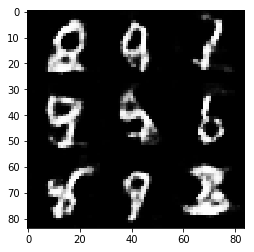

Epoch 1/2... Discriminator Loss: 1.1966... Generator Loss: 0.9400
Epoch 1/2... Discriminator Loss: 1.1635... Generator Loss: 1.0952
Epoch 1/2... Discriminator Loss: 1.1749... Generator Loss: 0.8404
Epoch 1/2... Discriminator Loss: 1.1642... Generator Loss: 0.8409
Epoch 1/2... Discriminator Loss: 1.0873... Generator Loss: 1.3460
Epoch 1/2... Discriminator Loss: 1.1065... Generator Loss: 0.9008
Epoch 1/2... Discriminator Loss: 1.2075... Generator Loss: 0.7967
Epoch 1/2... Discriminator Loss: 1.1001... Generator Loss: 0.8712
Epoch 1/2... Discriminator Loss: 1.1513... Generator Loss: 0.7556
Epoch 1/2... Discriminator Loss: 1.0692... Generator Loss: 1.0909


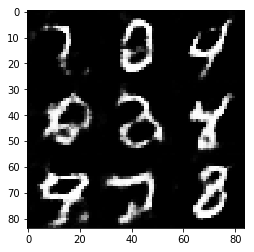

Epoch 1/2... Discriminator Loss: 1.2021... Generator Loss: 0.7674
Epoch 1/2... Discriminator Loss: 1.0020... Generator Loss: 0.9371
Epoch 1/2... Discriminator Loss: 1.1973... Generator Loss: 0.7689
Epoch 1/2... Discriminator Loss: 1.1523... Generator Loss: 0.8868
Epoch 1/2... Discriminator Loss: 1.0909... Generator Loss: 0.9324
Epoch 1/2... Discriminator Loss: 1.2141... Generator Loss: 0.7563
Epoch 1/2... Discriminator Loss: 1.1712... Generator Loss: 0.7293
Epoch 1/2... Discriminator Loss: 0.9648... Generator Loss: 1.1709
Epoch 1/2... Discriminator Loss: 1.0352... Generator Loss: 1.1528
Epoch 1/2... Discriminator Loss: 1.1466... Generator Loss: 1.0150


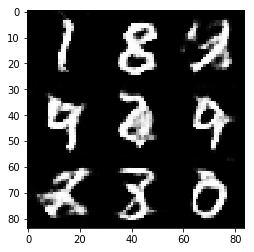

Epoch 1/2... Discriminator Loss: 1.1583... Generator Loss: 1.0381
Epoch 1/2... Discriminator Loss: 0.9754... Generator Loss: 1.2247
Epoch 1/2... Discriminator Loss: 1.0270... Generator Loss: 1.0446
Epoch 1/2... Discriminator Loss: 1.1717... Generator Loss: 1.2489
Epoch 1/2... Discriminator Loss: 1.1010... Generator Loss: 0.7750
Epoch 1/2... Discriminator Loss: 1.1452... Generator Loss: 0.8769
Epoch 1/2... Discriminator Loss: 1.1528... Generator Loss: 1.0189
Epoch 1/2... Discriminator Loss: 1.1735... Generator Loss: 0.9516
Epoch 1/2... Discriminator Loss: 1.2266... Generator Loss: 0.8913
Epoch 1/2... Discriminator Loss: 1.1166... Generator Loss: 0.9832


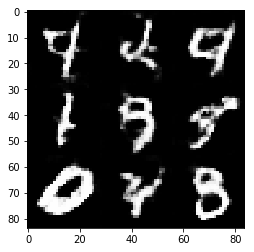

Epoch 1/2... Discriminator Loss: 1.1416... Generator Loss: 0.9041
Epoch 1/2... Discriminator Loss: 1.3010... Generator Loss: 0.5445
Epoch 1/2... Discriminator Loss: 1.0952... Generator Loss: 0.8680
Epoch 1/2... Discriminator Loss: 1.1161... Generator Loss: 1.0153
Epoch 1/2... Discriminator Loss: 1.0142... Generator Loss: 0.7950
Epoch 1/2... Discriminator Loss: 1.0206... Generator Loss: 0.9910
Epoch 1/2... Discriminator Loss: 1.1676... Generator Loss: 1.2781
Epoch 1/2... Discriminator Loss: 1.1103... Generator Loss: 0.9946
Epoch 1/2... Discriminator Loss: 1.1958... Generator Loss: 1.0029
Epoch 1/2... Discriminator Loss: 1.2127... Generator Loss: 1.0072


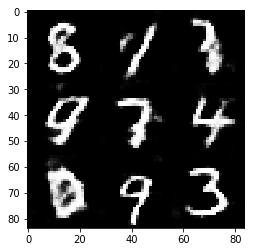

Epoch 1/2... Discriminator Loss: 1.0827... Generator Loss: 1.0711
Epoch 1/2... Discriminator Loss: 1.1024... Generator Loss: 0.8301
Epoch 1/2... Discriminator Loss: 1.3164... Generator Loss: 0.6090
Epoch 1/2... Discriminator Loss: 1.1869... Generator Loss: 0.9277
Epoch 1/2... Discriminator Loss: 1.2084... Generator Loss: 1.2707
Epoch 1/2... Discriminator Loss: 1.2876... Generator Loss: 1.0320
Epoch 1/2... Discriminator Loss: 1.3649... Generator Loss: 0.9580
Epoch 1/2... Discriminator Loss: 1.2991... Generator Loss: 0.6579
Epoch 1/2... Discriminator Loss: 1.0900... Generator Loss: 1.0218
Epoch 1/2... Discriminator Loss: 1.2222... Generator Loss: 1.0064


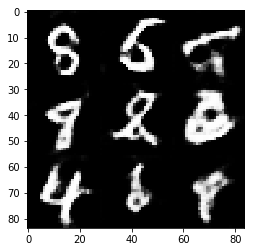

Epoch 1/2... Discriminator Loss: 1.2113... Generator Loss: 0.7517
Epoch 1/2... Discriminator Loss: 1.1149... Generator Loss: 1.1056
Epoch 1/2... Discriminator Loss: 1.1673... Generator Loss: 1.4749


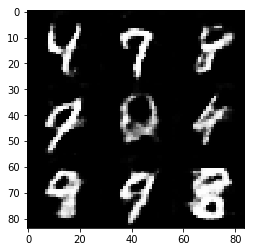

In [33]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 0/1... Discriminator Loss: 1.3625... Generator Loss: 0.6919


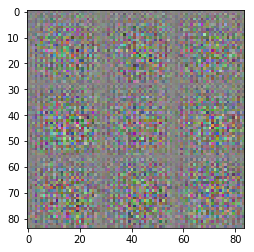

Epoch 0/1... Discriminator Loss: 0.8556... Generator Loss: 0.8621
Epoch 0/1... Discriminator Loss: 1.1046... Generator Loss: 1.0379
Epoch 0/1... Discriminator Loss: 0.9094... Generator Loss: 0.7475
Epoch 0/1... Discriminator Loss: 1.1578... Generator Loss: 0.7075
Epoch 0/1... Discriminator Loss: 0.9503... Generator Loss: 0.7434
Epoch 0/1... Discriminator Loss: 1.0495... Generator Loss: 0.8976
Epoch 0/1... Discriminator Loss: 0.9283... Generator Loss: 1.1757
Epoch 0/1... Discriminator Loss: 0.9823... Generator Loss: 0.9629
Epoch 0/1... Discriminator Loss: 0.6805... Generator Loss: 1.3765
Epoch 0/1... Discriminator Loss: 0.7562... Generator Loss: 1.8689


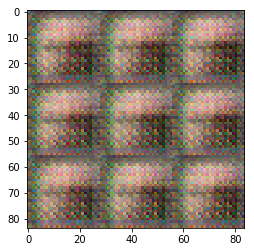

Epoch 0/1... Discriminator Loss: 1.2982... Generator Loss: 1.0195
Epoch 0/1... Discriminator Loss: 1.1568... Generator Loss: 0.7345
Epoch 0/1... Discriminator Loss: 1.0335... Generator Loss: 0.8894
Epoch 0/1... Discriminator Loss: 1.0875... Generator Loss: 1.8621
Epoch 0/1... Discriminator Loss: 0.6991... Generator Loss: 1.2096
Epoch 0/1... Discriminator Loss: 0.4843... Generator Loss: 1.9889
Epoch 0/1... Discriminator Loss: 1.6535... Generator Loss: 0.7514
Epoch 0/1... Discriminator Loss: 0.8223... Generator Loss: 1.1798
Epoch 0/1... Discriminator Loss: 0.6596... Generator Loss: 1.7489
Epoch 0/1... Discriminator Loss: 1.7636... Generator Loss: 0.5432


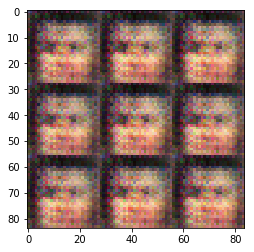

Epoch 0/1... Discriminator Loss: 0.7653... Generator Loss: 1.0538
Epoch 0/1... Discriminator Loss: 0.6441... Generator Loss: 1.5677
Epoch 0/1... Discriminator Loss: 1.2489... Generator Loss: 0.7603
Epoch 0/1... Discriminator Loss: 0.9154... Generator Loss: 0.8218
Epoch 0/1... Discriminator Loss: 0.4928... Generator Loss: 1.8291
Epoch 0/1... Discriminator Loss: 1.2130... Generator Loss: 2.5864
Epoch 0/1... Discriminator Loss: 0.8245... Generator Loss: 1.1985
Epoch 0/1... Discriminator Loss: 0.6238... Generator Loss: 1.2580
Epoch 0/1... Discriminator Loss: 0.9520... Generator Loss: 1.4398
Epoch 0/1... Discriminator Loss: 0.8184... Generator Loss: 1.0552


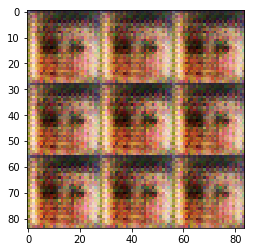

Epoch 0/1... Discriminator Loss: 0.7267... Generator Loss: 1.2248
Epoch 0/1... Discriminator Loss: 0.8612... Generator Loss: 2.1326
Epoch 0/1... Discriminator Loss: 0.7556... Generator Loss: 2.5192
Epoch 0/1... Discriminator Loss: 0.8587... Generator Loss: 1.0261
Epoch 0/1... Discriminator Loss: 1.4160... Generator Loss: 1.3236
Epoch 0/1... Discriminator Loss: 1.4639... Generator Loss: 1.0287
Epoch 0/1... Discriminator Loss: 1.5907... Generator Loss: 0.7590
Epoch 0/1... Discriminator Loss: 1.1052... Generator Loss: 0.8262
Epoch 0/1... Discriminator Loss: 0.9765... Generator Loss: 0.8967
Epoch 0/1... Discriminator Loss: 0.9402... Generator Loss: 1.0749


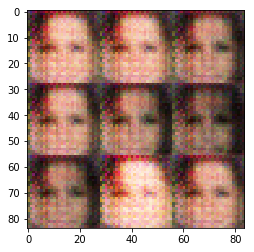

Epoch 0/1... Discriminator Loss: 0.9159... Generator Loss: 1.0730
Epoch 0/1... Discriminator Loss: 0.9421... Generator Loss: 0.8397
Epoch 0/1... Discriminator Loss: 1.4168... Generator Loss: 1.8725
Epoch 0/1... Discriminator Loss: 1.1750... Generator Loss: 0.8426
Epoch 0/1... Discriminator Loss: 1.0660... Generator Loss: 1.0806
Epoch 0/1... Discriminator Loss: 0.7994... Generator Loss: 1.1970
Epoch 0/1... Discriminator Loss: 0.9011... Generator Loss: 1.2836
Epoch 0/1... Discriminator Loss: 0.9425... Generator Loss: 1.2801
Epoch 0/1... Discriminator Loss: 1.4332... Generator Loss: 0.7034
Epoch 0/1... Discriminator Loss: 0.9265... Generator Loss: 1.1974


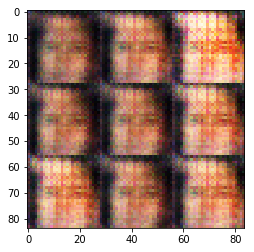

Epoch 0/1... Discriminator Loss: 1.1841... Generator Loss: 1.1888
Epoch 0/1... Discriminator Loss: 0.7630... Generator Loss: 1.4500
Epoch 0/1... Discriminator Loss: 0.9093... Generator Loss: 1.1442
Epoch 0/1... Discriminator Loss: 0.8434... Generator Loss: 1.2096
Epoch 0/1... Discriminator Loss: 0.8825... Generator Loss: 0.8333
Epoch 0/1... Discriminator Loss: 0.9132... Generator Loss: 0.9398
Epoch 0/1... Discriminator Loss: 1.1198... Generator Loss: 1.0887
Epoch 0/1... Discriminator Loss: 1.1894... Generator Loss: 0.8470
Epoch 0/1... Discriminator Loss: 0.7124... Generator Loss: 1.4281
Epoch 0/1... Discriminator Loss: 1.3249... Generator Loss: 0.9043


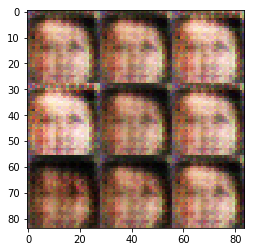

Epoch 0/1... Discriminator Loss: 0.8565... Generator Loss: 0.9800
Epoch 0/1... Discriminator Loss: 1.0894... Generator Loss: 0.6702
Epoch 0/1... Discriminator Loss: 0.9370... Generator Loss: 1.1219
Epoch 0/1... Discriminator Loss: 0.7223... Generator Loss: 1.1229
Epoch 0/1... Discriminator Loss: 0.8454... Generator Loss: 1.2648
Epoch 0/1... Discriminator Loss: 0.9936... Generator Loss: 1.2768
Epoch 0/1... Discriminator Loss: 1.0973... Generator Loss: 0.5932
Epoch 0/1... Discriminator Loss: 0.8446... Generator Loss: 1.3911
Epoch 0/1... Discriminator Loss: 1.1702... Generator Loss: 0.8126
Epoch 0/1... Discriminator Loss: 0.8753... Generator Loss: 1.2182


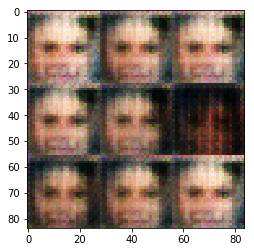

Epoch 0/1... Discriminator Loss: 0.7926... Generator Loss: 1.1524
Epoch 0/1... Discriminator Loss: 0.7608... Generator Loss: 1.0992
Epoch 0/1... Discriminator Loss: 0.6602... Generator Loss: 1.3926
Epoch 0/1... Discriminator Loss: 0.8268... Generator Loss: 0.9829
Epoch 0/1... Discriminator Loss: 0.9449... Generator Loss: 1.5105
Epoch 0/1... Discriminator Loss: 1.0979... Generator Loss: 0.7590
Epoch 0/1... Discriminator Loss: 0.6210... Generator Loss: 1.2125
Epoch 0/1... Discriminator Loss: 0.4268... Generator Loss: 1.7927
Epoch 0/1... Discriminator Loss: 2.1289... Generator Loss: 3.0289
Epoch 0/1... Discriminator Loss: 0.7795... Generator Loss: 1.3229


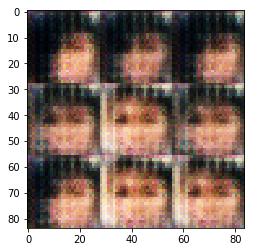

Epoch 0/1... Discriminator Loss: 1.0335... Generator Loss: 1.0508
Epoch 0/1... Discriminator Loss: 1.2151... Generator Loss: 0.8781
Epoch 0/1... Discriminator Loss: 1.1209... Generator Loss: 0.9550
Epoch 0/1... Discriminator Loss: 0.9418... Generator Loss: 1.1300
Epoch 0/1... Discriminator Loss: 1.0176... Generator Loss: 1.1349
Epoch 0/1... Discriminator Loss: 0.7275... Generator Loss: 1.1156
Epoch 0/1... Discriminator Loss: 1.2383... Generator Loss: 1.0585
Epoch 0/1... Discriminator Loss: 0.7544... Generator Loss: 1.3650
Epoch 0/1... Discriminator Loss: 0.7878... Generator Loss: 0.9816
Epoch 0/1... Discriminator Loss: 1.0337... Generator Loss: 2.0877


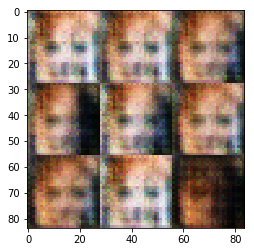

Epoch 0/1... Discriminator Loss: 1.3282... Generator Loss: 0.9390
Epoch 0/1... Discriminator Loss: 1.0049... Generator Loss: 0.8675
Epoch 0/1... Discriminator Loss: 1.0795... Generator Loss: 1.0674
Epoch 0/1... Discriminator Loss: 1.0728... Generator Loss: 1.0506
Epoch 0/1... Discriminator Loss: 0.9434... Generator Loss: 1.1182
Epoch 0/1... Discriminator Loss: 0.8467... Generator Loss: 1.0893
Epoch 0/1... Discriminator Loss: 0.9600... Generator Loss: 1.1707
Epoch 0/1... Discriminator Loss: 1.1815... Generator Loss: 1.8724
Epoch 0/1... Discriminator Loss: 1.2283... Generator Loss: 0.7868
Epoch 0/1... Discriminator Loss: 0.9750... Generator Loss: 0.9120


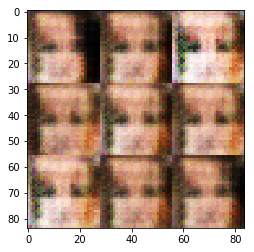

Epoch 0/1... Discriminator Loss: 0.9395... Generator Loss: 1.0175
Epoch 0/1... Discriminator Loss: 0.8801... Generator Loss: 0.9471
Epoch 0/1... Discriminator Loss: 1.1381... Generator Loss: 0.8403
Epoch 0/1... Discriminator Loss: 1.1493... Generator Loss: 0.8606
Epoch 0/1... Discriminator Loss: 0.8722... Generator Loss: 0.9774
Epoch 0/1... Discriminator Loss: 0.9824... Generator Loss: 0.9727
Epoch 0/1... Discriminator Loss: 1.0110... Generator Loss: 1.1739
Epoch 0/1... Discriminator Loss: 1.2066... Generator Loss: 0.9631
Epoch 0/1... Discriminator Loss: 0.7544... Generator Loss: 1.0635
Epoch 0/1... Discriminator Loss: 0.9372... Generator Loss: 1.4677


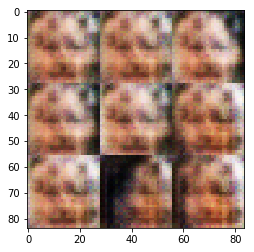

Epoch 0/1... Discriminator Loss: 1.1216... Generator Loss: 1.0106
Epoch 0/1... Discriminator Loss: 1.0501... Generator Loss: 1.2664
Epoch 0/1... Discriminator Loss: 1.0131... Generator Loss: 1.0814
Epoch 0/1... Discriminator Loss: 1.0280... Generator Loss: 1.0511
Epoch 0/1... Discriminator Loss: 0.9813... Generator Loss: 1.1259
Epoch 0/1... Discriminator Loss: 1.1048... Generator Loss: 0.9016
Epoch 0/1... Discriminator Loss: 1.1822... Generator Loss: 1.5095
Epoch 0/1... Discriminator Loss: 1.0849... Generator Loss: 1.0326
Epoch 0/1... Discriminator Loss: 1.0570... Generator Loss: 1.0577
Epoch 0/1... Discriminator Loss: 0.9167... Generator Loss: 1.0635


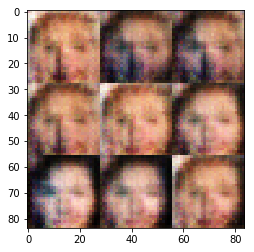

Epoch 0/1... Discriminator Loss: 1.0152... Generator Loss: 0.9984
Epoch 0/1... Discriminator Loss: 1.4654... Generator Loss: 0.6890
Epoch 0/1... Discriminator Loss: 1.2011... Generator Loss: 0.9850
Epoch 0/1... Discriminator Loss: 1.3419... Generator Loss: 0.8874
Epoch 0/1... Discriminator Loss: 1.0771... Generator Loss: 0.9016
Epoch 0/1... Discriminator Loss: 0.9700... Generator Loss: 1.2914
Epoch 0/1... Discriminator Loss: 0.9788... Generator Loss: 1.1405
Epoch 0/1... Discriminator Loss: 1.0634... Generator Loss: 0.8073
Epoch 0/1... Discriminator Loss: 1.1688... Generator Loss: 0.8535
Epoch 0/1... Discriminator Loss: 0.9814... Generator Loss: 0.8942


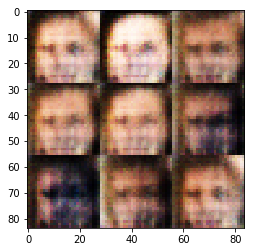

Epoch 0/1... Discriminator Loss: 0.9954... Generator Loss: 1.2254
Epoch 0/1... Discriminator Loss: 1.2572... Generator Loss: 1.2241
Epoch 0/1... Discriminator Loss: 1.1466... Generator Loss: 0.8117
Epoch 0/1... Discriminator Loss: 0.9977... Generator Loss: 1.1865
Epoch 0/1... Discriminator Loss: 1.0254... Generator Loss: 0.8544
Epoch 0/1... Discriminator Loss: 1.0770... Generator Loss: 0.9248
Epoch 0/1... Discriminator Loss: 1.1550... Generator Loss: 1.1523
Epoch 0/1... Discriminator Loss: 1.3225... Generator Loss: 0.6324
Epoch 0/1... Discriminator Loss: 0.7486... Generator Loss: 1.4220
Epoch 0/1... Discriminator Loss: 1.1350... Generator Loss: 1.0538


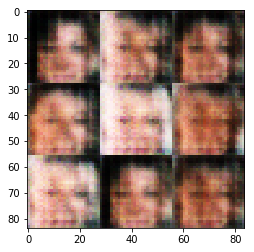

Epoch 0/1... Discriminator Loss: 1.0393... Generator Loss: 0.8265
Epoch 0/1... Discriminator Loss: 1.1909... Generator Loss: 0.8023
Epoch 0/1... Discriminator Loss: 1.0628... Generator Loss: 1.2651
Epoch 0/1... Discriminator Loss: 0.8505... Generator Loss: 1.1538
Epoch 0/1... Discriminator Loss: 0.9128... Generator Loss: 1.0546
Epoch 0/1... Discriminator Loss: 0.7893... Generator Loss: 1.0423
Epoch 0/1... Discriminator Loss: 1.2539... Generator Loss: 0.8115
Epoch 0/1... Discriminator Loss: 1.2075... Generator Loss: 0.7809
Epoch 0/1... Discriminator Loss: 1.0573... Generator Loss: 1.2366
Epoch 0/1... Discriminator Loss: 1.1955... Generator Loss: 0.8594


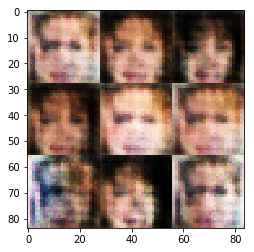

Epoch 0/1... Discriminator Loss: 0.9570... Generator Loss: 1.0378
Epoch 0/1... Discriminator Loss: 0.9441... Generator Loss: 1.3530
Epoch 0/1... Discriminator Loss: 1.4129... Generator Loss: 0.6669
Epoch 0/1... Discriminator Loss: 0.9816... Generator Loss: 0.9130
Epoch 0/1... Discriminator Loss: 1.1002... Generator Loss: 1.0227
Epoch 0/1... Discriminator Loss: 0.9245... Generator Loss: 0.9070
Epoch 0/1... Discriminator Loss: 1.4658... Generator Loss: 0.6727
Epoch 0/1... Discriminator Loss: 1.0904... Generator Loss: 0.9147
Epoch 0/1... Discriminator Loss: 1.2778... Generator Loss: 0.7361
Epoch 0/1... Discriminator Loss: 1.0648... Generator Loss: 0.9410


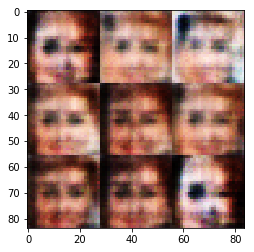

Epoch 0/1... Discriminator Loss: 1.1695... Generator Loss: 0.6397
Epoch 0/1... Discriminator Loss: 1.0270... Generator Loss: 1.1077
Epoch 0/1... Discriminator Loss: 0.8781... Generator Loss: 1.3044
Epoch 0/1... Discriminator Loss: 1.2348... Generator Loss: 0.8513
Epoch 0/1... Discriminator Loss: 1.0595... Generator Loss: 0.7809
Epoch 0/1... Discriminator Loss: 1.1104... Generator Loss: 0.9449
Epoch 0/1... Discriminator Loss: 1.1327... Generator Loss: 0.8561
Epoch 0/1... Discriminator Loss: 0.7393... Generator Loss: 1.4591
Epoch 0/1... Discriminator Loss: 1.3166... Generator Loss: 0.7162
Epoch 0/1... Discriminator Loss: 1.2962... Generator Loss: 0.8678


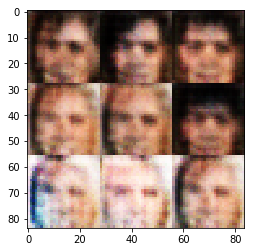

Epoch 0/1... Discriminator Loss: 1.0214... Generator Loss: 0.8377
Epoch 0/1... Discriminator Loss: 1.0477... Generator Loss: 0.9734
Epoch 0/1... Discriminator Loss: 1.0028... Generator Loss: 0.9090
Epoch 0/1... Discriminator Loss: 1.2233... Generator Loss: 0.6669
Epoch 0/1... Discriminator Loss: 1.1412... Generator Loss: 1.3212
Epoch 0/1... Discriminator Loss: 1.2231... Generator Loss: 1.1683
Epoch 0/1... Discriminator Loss: 1.0996... Generator Loss: 1.0733
Epoch 0/1... Discriminator Loss: 1.0849... Generator Loss: 0.9485
Epoch 0/1... Discriminator Loss: 1.2470... Generator Loss: 0.8406
Epoch 0/1... Discriminator Loss: 1.1166... Generator Loss: 1.1269


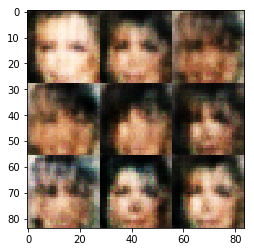

Epoch 0/1... Discriminator Loss: 0.9696... Generator Loss: 1.0367
Epoch 0/1... Discriminator Loss: 1.0572... Generator Loss: 0.8089
Epoch 0/1... Discriminator Loss: 0.9485... Generator Loss: 1.0120
Epoch 0/1... Discriminator Loss: 1.2227... Generator Loss: 0.6037
Epoch 0/1... Discriminator Loss: 1.1146... Generator Loss: 0.7026
Epoch 0/1... Discriminator Loss: 1.2585... Generator Loss: 0.9516
Epoch 0/1... Discriminator Loss: 1.0010... Generator Loss: 1.4208
Epoch 0/1... Discriminator Loss: 1.2015... Generator Loss: 1.0908
Epoch 0/1... Discriminator Loss: 1.0519... Generator Loss: 1.0238
Epoch 0/1... Discriminator Loss: 0.9235... Generator Loss: 1.4407


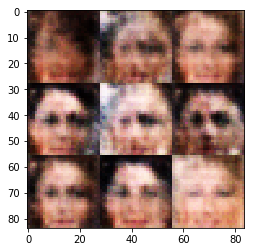

Epoch 0/1... Discriminator Loss: 0.9083... Generator Loss: 1.1413
Epoch 0/1... Discriminator Loss: 0.8943... Generator Loss: 1.2097
Epoch 0/1... Discriminator Loss: 1.1295... Generator Loss: 1.2556
Epoch 0/1... Discriminator Loss: 1.1177... Generator Loss: 1.1840
Epoch 0/1... Discriminator Loss: 1.3524... Generator Loss: 0.9676
Epoch 0/1... Discriminator Loss: 1.1734... Generator Loss: 1.1584
Epoch 0/1... Discriminator Loss: 1.0166... Generator Loss: 1.0044
Epoch 0/1... Discriminator Loss: 1.2403... Generator Loss: 0.8023
Epoch 0/1... Discriminator Loss: 0.9559... Generator Loss: 0.9326
Epoch 0/1... Discriminator Loss: 1.1325... Generator Loss: 0.9720


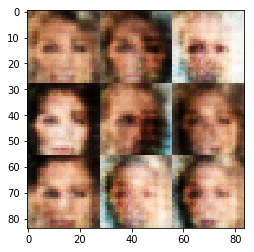

Epoch 0/1... Discriminator Loss: 0.9882... Generator Loss: 0.9080
Epoch 0/1... Discriminator Loss: 1.2398... Generator Loss: 0.8564
Epoch 0/1... Discriminator Loss: 1.1427... Generator Loss: 0.6977
Epoch 0/1... Discriminator Loss: 1.0809... Generator Loss: 0.8952
Epoch 0/1... Discriminator Loss: 1.1506... Generator Loss: 1.0999
Epoch 0/1... Discriminator Loss: 1.3574... Generator Loss: 0.9037
Epoch 0/1... Discriminator Loss: 1.0653... Generator Loss: 1.0217
Epoch 0/1... Discriminator Loss: 1.0844... Generator Loss: 1.1497
Epoch 0/1... Discriminator Loss: 1.1892... Generator Loss: 1.0745
Epoch 0/1... Discriminator Loss: 0.9708... Generator Loss: 0.8788


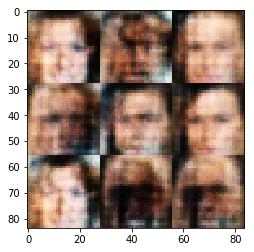

Epoch 0/1... Discriminator Loss: 1.1430... Generator Loss: 0.8622
Epoch 0/1... Discriminator Loss: 1.2799... Generator Loss: 1.0620
Epoch 0/1... Discriminator Loss: 1.1372... Generator Loss: 0.9206
Epoch 0/1... Discriminator Loss: 1.1791... Generator Loss: 0.7395
Epoch 0/1... Discriminator Loss: 0.9285... Generator Loss: 1.1290
Epoch 0/1... Discriminator Loss: 1.1995... Generator Loss: 0.9822
Epoch 0/1... Discriminator Loss: 1.1521... Generator Loss: 1.0533
Epoch 0/1... Discriminator Loss: 1.2788... Generator Loss: 0.9332
Epoch 0/1... Discriminator Loss: 1.3299... Generator Loss: 0.7760
Epoch 0/1... Discriminator Loss: 1.2300... Generator Loss: 0.8414


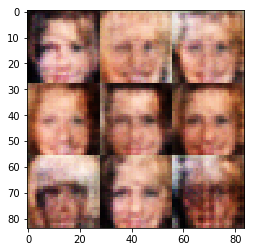

Epoch 0/1... Discriminator Loss: 1.1574... Generator Loss: 0.8115
Epoch 0/1... Discriminator Loss: 0.9254... Generator Loss: 0.8811
Epoch 0/1... Discriminator Loss: 1.3024... Generator Loss: 0.8181
Epoch 0/1... Discriminator Loss: 1.1393... Generator Loss: 0.8270
Epoch 0/1... Discriminator Loss: 1.2448... Generator Loss: 0.9042
Epoch 0/1... Discriminator Loss: 1.2414... Generator Loss: 0.7492
Epoch 0/1... Discriminator Loss: 1.1067... Generator Loss: 0.9661
Epoch 0/1... Discriminator Loss: 1.2924... Generator Loss: 0.8157
Epoch 0/1... Discriminator Loss: 1.2438... Generator Loss: 0.8045
Epoch 0/1... Discriminator Loss: 1.1321... Generator Loss: 0.7711


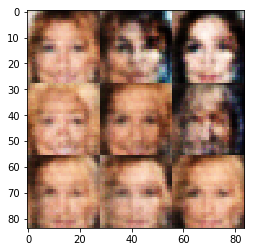

Epoch 0/1... Discriminator Loss: 1.1238... Generator Loss: 0.9114
Epoch 0/1... Discriminator Loss: 1.1749... Generator Loss: 0.9848
Epoch 0/1... Discriminator Loss: 1.1765... Generator Loss: 0.8810
Epoch 0/1... Discriminator Loss: 1.2247... Generator Loss: 0.6903
Epoch 0/1... Discriminator Loss: 1.1985... Generator Loss: 0.6875
Epoch 0/1... Discriminator Loss: 1.0475... Generator Loss: 1.0413
Epoch 0/1... Discriminator Loss: 1.2063... Generator Loss: 0.7602
Epoch 0/1... Discriminator Loss: 1.2036... Generator Loss: 0.8469
Epoch 0/1... Discriminator Loss: 1.1357... Generator Loss: 0.7984
Epoch 0/1... Discriminator Loss: 1.3013... Generator Loss: 0.6777


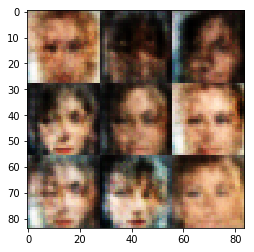

Epoch 0/1... Discriminator Loss: 1.3104... Generator Loss: 0.8305
Epoch 0/1... Discriminator Loss: 1.2694... Generator Loss: 1.1145
Epoch 0/1... Discriminator Loss: 1.1939... Generator Loss: 0.9253
Epoch 0/1... Discriminator Loss: 1.2750... Generator Loss: 0.5648
Epoch 0/1... Discriminator Loss: 1.3009... Generator Loss: 0.8709
Epoch 0/1... Discriminator Loss: 1.3611... Generator Loss: 0.8144
Epoch 0/1... Discriminator Loss: 1.0582... Generator Loss: 0.9217
Epoch 0/1... Discriminator Loss: 1.0176... Generator Loss: 1.0625
Epoch 0/1... Discriminator Loss: 1.2606... Generator Loss: 0.7967
Epoch 0/1... Discriminator Loss: 1.1058... Generator Loss: 0.7964


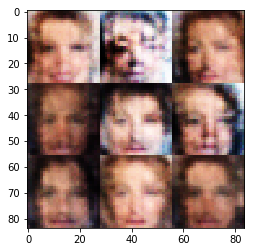

Epoch 0/1... Discriminator Loss: 1.0835... Generator Loss: 1.0172
Epoch 0/1... Discriminator Loss: 1.2453... Generator Loss: 0.8679
Epoch 0/1... Discriminator Loss: 1.0918... Generator Loss: 0.9098
Epoch 0/1... Discriminator Loss: 1.3673... Generator Loss: 0.8891
Epoch 0/1... Discriminator Loss: 1.2161... Generator Loss: 0.9431
Epoch 0/1... Discriminator Loss: 1.2517... Generator Loss: 0.8758
Epoch 0/1... Discriminator Loss: 1.4508... Generator Loss: 0.8030
Epoch 0/1... Discriminator Loss: 1.3558... Generator Loss: 0.7656
Epoch 0/1... Discriminator Loss: 1.1147... Generator Loss: 0.8364
Epoch 0/1... Discriminator Loss: 1.2152... Generator Loss: 0.7693


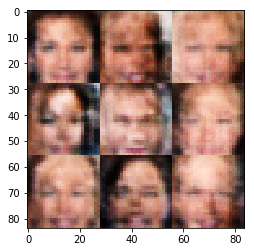

Epoch 0/1... Discriminator Loss: 1.2173... Generator Loss: 1.0472
Epoch 0/1... Discriminator Loss: 1.2656... Generator Loss: 0.7611
Epoch 0/1... Discriminator Loss: 1.0199... Generator Loss: 0.9107
Epoch 0/1... Discriminator Loss: 1.2402... Generator Loss: 0.9052
Epoch 0/1... Discriminator Loss: 1.2689... Generator Loss: 0.6918
Epoch 0/1... Discriminator Loss: 1.1557... Generator Loss: 0.8357
Epoch 0/1... Discriminator Loss: 1.2420... Generator Loss: 0.8917
Epoch 0/1... Discriminator Loss: 1.2545... Generator Loss: 0.7106
Epoch 0/1... Discriminator Loss: 1.0510... Generator Loss: 0.8442
Epoch 0/1... Discriminator Loss: 1.3499... Generator Loss: 0.8760


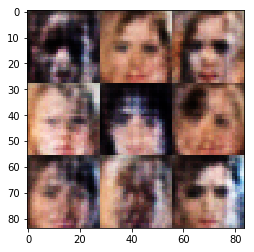

Epoch 0/1... Discriminator Loss: 1.1978... Generator Loss: 0.8700
Epoch 0/1... Discriminator Loss: 1.2346... Generator Loss: 0.8796
Epoch 0/1... Discriminator Loss: 1.2506... Generator Loss: 0.7172
Epoch 0/1... Discriminator Loss: 1.2218... Generator Loss: 0.8352
Epoch 0/1... Discriminator Loss: 1.1485... Generator Loss: 0.8815
Epoch 0/1... Discriminator Loss: 1.1226... Generator Loss: 0.7819
Epoch 0/1... Discriminator Loss: 1.1356... Generator Loss: 0.8426
Epoch 0/1... Discriminator Loss: 1.3566... Generator Loss: 0.8273
Epoch 0/1... Discriminator Loss: 1.1590... Generator Loss: 0.8934
Epoch 0/1... Discriminator Loss: 1.1627... Generator Loss: 0.6803


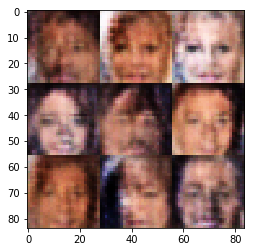

Epoch 0/1... Discriminator Loss: 1.3559... Generator Loss: 0.6401
Epoch 0/1... Discriminator Loss: 1.2849... Generator Loss: 0.9204
Epoch 0/1... Discriminator Loss: 1.1519... Generator Loss: 0.9179
Epoch 0/1... Discriminator Loss: 1.0406... Generator Loss: 0.8776
Epoch 0/1... Discriminator Loss: 1.2318... Generator Loss: 0.8226
Epoch 0/1... Discriminator Loss: 1.1776... Generator Loss: 1.1517
Epoch 0/1... Discriminator Loss: 1.3215... Generator Loss: 0.7656
Epoch 0/1... Discriminator Loss: 1.2378... Generator Loss: 0.7765
Epoch 0/1... Discriminator Loss: 1.1515... Generator Loss: 1.0851
Epoch 0/1... Discriminator Loss: 1.2246... Generator Loss: 0.7029


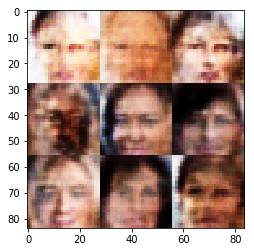

Epoch 0/1... Discriminator Loss: 1.1854... Generator Loss: 0.8933
Epoch 0/1... Discriminator Loss: 1.2574... Generator Loss: 0.7327
Epoch 0/1... Discriminator Loss: 1.1078... Generator Loss: 0.7701
Epoch 0/1... Discriminator Loss: 1.1928... Generator Loss: 0.8403
Epoch 0/1... Discriminator Loss: 1.1382... Generator Loss: 0.7873
Epoch 0/1... Discriminator Loss: 1.2965... Generator Loss: 0.6694
Epoch 0/1... Discriminator Loss: 1.2769... Generator Loss: 0.7819
Epoch 0/1... Discriminator Loss: 1.0888... Generator Loss: 0.7803
Epoch 0/1... Discriminator Loss: 1.1472... Generator Loss: 1.3216
Epoch 0/1... Discriminator Loss: 1.1318... Generator Loss: 0.8933


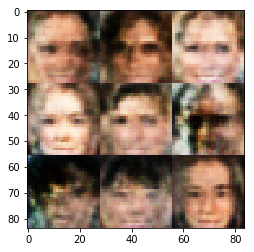

Epoch 0/1... Discriminator Loss: 1.2141... Generator Loss: 0.5803
Epoch 0/1... Discriminator Loss: 1.0084... Generator Loss: 0.9026
Epoch 0/1... Discriminator Loss: 1.0606... Generator Loss: 0.9235
Epoch 0/1... Discriminator Loss: 1.3336... Generator Loss: 0.8331
Epoch 0/1... Discriminator Loss: 1.2392... Generator Loss: 0.9314
Epoch 0/1... Discriminator Loss: 1.0977... Generator Loss: 0.8337
Epoch 0/1... Discriminator Loss: 1.0806... Generator Loss: 0.9631
Epoch 0/1... Discriminator Loss: 1.2583... Generator Loss: 1.0268
Epoch 0/1... Discriminator Loss: 1.1463... Generator Loss: 0.6364
Epoch 0/1... Discriminator Loss: 1.2634... Generator Loss: 0.8038


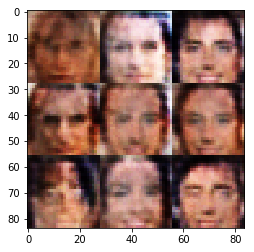

Epoch 0/1... Discriminator Loss: 1.1552... Generator Loss: 0.9314
Epoch 0/1... Discriminator Loss: 1.2208... Generator Loss: 0.8947
Epoch 0/1... Discriminator Loss: 1.1770... Generator Loss: 0.7193
Epoch 0/1... Discriminator Loss: 1.1915... Generator Loss: 0.7990
Epoch 0/1... Discriminator Loss: 1.2608... Generator Loss: 0.7022
Epoch 0/1... Discriminator Loss: 1.3185... Generator Loss: 0.8512
Epoch 0/1... Discriminator Loss: 1.3409... Generator Loss: 0.6682
Epoch 0/1... Discriminator Loss: 1.2194... Generator Loss: 0.6841
Epoch 0/1... Discriminator Loss: 1.3091... Generator Loss: 0.7973
Epoch 0/1... Discriminator Loss: 1.3599... Generator Loss: 0.7324


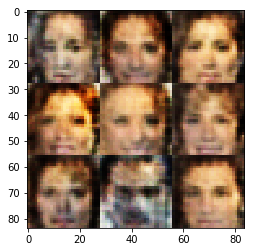

Epoch 0/1... Discriminator Loss: 1.1491... Generator Loss: 0.9440
Epoch 0/1... Discriminator Loss: 1.3493... Generator Loss: 0.7180
Epoch 0/1... Discriminator Loss: 1.3559... Generator Loss: 0.7421
Epoch 0/1... Discriminator Loss: 1.2314... Generator Loss: 0.7659
Epoch 0/1... Discriminator Loss: 1.0657... Generator Loss: 0.8102
Epoch 0/1... Discriminator Loss: 1.4182... Generator Loss: 0.8990
Epoch 0/1... Discriminator Loss: 1.3137... Generator Loss: 0.7863
Epoch 0/1... Discriminator Loss: 1.2341... Generator Loss: 0.7549
Epoch 0/1... Discriminator Loss: 1.2530... Generator Loss: 0.7525
Epoch 0/1... Discriminator Loss: 1.1625... Generator Loss: 0.8618


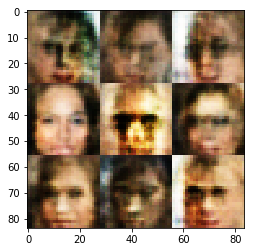

Epoch 0/1... Discriminator Loss: 1.3212... Generator Loss: 0.7017
Epoch 0/1... Discriminator Loss: 1.1882... Generator Loss: 0.8086
Epoch 0/1... Discriminator Loss: 1.3580... Generator Loss: 0.6863
Epoch 0/1... Discriminator Loss: 1.0993... Generator Loss: 0.8226
Epoch 0/1... Discriminator Loss: 1.2151... Generator Loss: 0.7434
Epoch 0/1... Discriminator Loss: 1.1503... Generator Loss: 0.8277
Epoch 0/1... Discriminator Loss: 1.2266... Generator Loss: 0.6797
Epoch 0/1... Discriminator Loss: 1.2782... Generator Loss: 0.8440
Epoch 0/1... Discriminator Loss: 1.2426... Generator Loss: 0.7715
Epoch 0/1... Discriminator Loss: 1.2547... Generator Loss: 0.7257


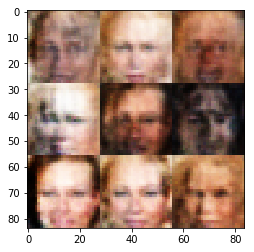

Epoch 0/1... Discriminator Loss: 1.1859... Generator Loss: 0.8179
Epoch 0/1... Discriminator Loss: 1.1976... Generator Loss: 0.7606
Epoch 0/1... Discriminator Loss: 1.1289... Generator Loss: 0.7000
Epoch 0/1... Discriminator Loss: 1.1970... Generator Loss: 0.7606
Epoch 0/1... Discriminator Loss: 1.3228... Generator Loss: 0.7383
Epoch 0/1... Discriminator Loss: 1.1419... Generator Loss: 0.7609
Epoch 0/1... Discriminator Loss: 1.2770... Generator Loss: 0.6678
Epoch 0/1... Discriminator Loss: 1.2848... Generator Loss: 0.7237
Epoch 0/1... Discriminator Loss: 1.2683... Generator Loss: 0.8448
Epoch 0/1... Discriminator Loss: 1.2644... Generator Loss: 0.7114


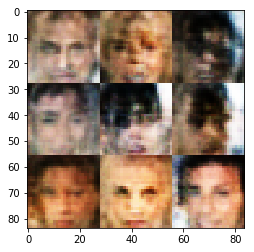

Epoch 0/1... Discriminator Loss: 1.2387... Generator Loss: 0.7571
Epoch 0/1... Discriminator Loss: 1.2506... Generator Loss: 0.7662
Epoch 0/1... Discriminator Loss: 1.2571... Generator Loss: 0.7784
Epoch 0/1... Discriminator Loss: 1.1980... Generator Loss: 0.8190
Epoch 0/1... Discriminator Loss: 1.1687... Generator Loss: 0.8211
Epoch 0/1... Discriminator Loss: 1.3655... Generator Loss: 0.7106
Epoch 0/1... Discriminator Loss: 1.2647... Generator Loss: 0.8854
Epoch 0/1... Discriminator Loss: 1.1541... Generator Loss: 0.8571
Epoch 0/1... Discriminator Loss: 1.2420... Generator Loss: 0.6542
Epoch 0/1... Discriminator Loss: 1.2077... Generator Loss: 0.7259


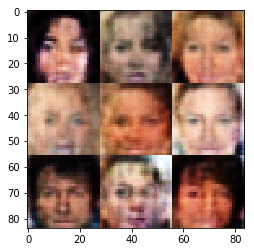

Epoch 0/1... Discriminator Loss: 1.3262... Generator Loss: 0.7276
Epoch 0/1... Discriminator Loss: 1.3081... Generator Loss: 0.6939
Epoch 0/1... Discriminator Loss: 1.1216... Generator Loss: 0.8222
Epoch 0/1... Discriminator Loss: 1.4376... Generator Loss: 0.8051
Epoch 0/1... Discriminator Loss: 1.2996... Generator Loss: 0.8961
Epoch 0/1... Discriminator Loss: 1.2836... Generator Loss: 0.8857
Epoch 0/1... Discriminator Loss: 1.2640... Generator Loss: 0.8941
Epoch 0/1... Discriminator Loss: 1.2960... Generator Loss: 0.7092
Epoch 0/1... Discriminator Loss: 1.1716... Generator Loss: 0.7478
Epoch 0/1... Discriminator Loss: 1.2698... Generator Loss: 0.8052


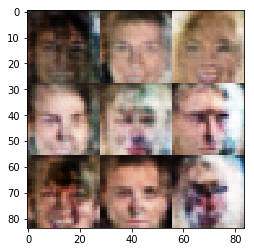

Epoch 0/1... Discriminator Loss: 1.3443... Generator Loss: 0.8420
Epoch 0/1... Discriminator Loss: 1.2776... Generator Loss: 0.7703
Epoch 0/1... Discriminator Loss: 1.2917... Generator Loss: 0.7680
Epoch 0/1... Discriminator Loss: 1.2463... Generator Loss: 0.8813
Epoch 0/1... Discriminator Loss: 1.2871... Generator Loss: 0.8275
Epoch 0/1... Discriminator Loss: 1.2417... Generator Loss: 0.7338
Epoch 0/1... Discriminator Loss: 1.1999... Generator Loss: 0.7637
Epoch 0/1... Discriminator Loss: 1.2982... Generator Loss: 0.8676
Epoch 0/1... Discriminator Loss: 1.2013... Generator Loss: 0.7414
Epoch 0/1... Discriminator Loss: 1.1769... Generator Loss: 1.0131


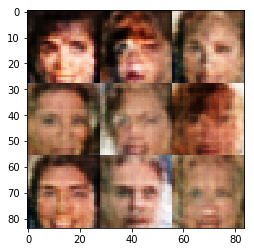

Epoch 0/1... Discriminator Loss: 1.1806... Generator Loss: 0.8399
Epoch 0/1... Discriminator Loss: 1.3004... Generator Loss: 0.8109
Epoch 0/1... Discriminator Loss: 1.1674... Generator Loss: 0.7868
Epoch 0/1... Discriminator Loss: 1.3164... Generator Loss: 0.7689
Epoch 0/1... Discriminator Loss: 1.2546... Generator Loss: 0.8629
Epoch 0/1... Discriminator Loss: 1.1624... Generator Loss: 0.7587
Epoch 0/1... Discriminator Loss: 1.1526... Generator Loss: 0.7497
Epoch 0/1... Discriminator Loss: 1.2867... Generator Loss: 0.8635
Epoch 0/1... Discriminator Loss: 1.3022... Generator Loss: 0.8819
Epoch 0/1... Discriminator Loss: 1.1296... Generator Loss: 0.7567


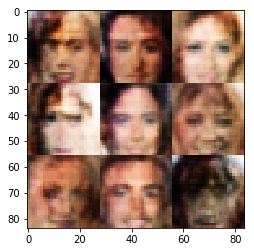

Epoch 0/1... Discriminator Loss: 1.3705... Generator Loss: 0.8272
Epoch 0/1... Discriminator Loss: 1.2301... Generator Loss: 0.6661
Epoch 0/1... Discriminator Loss: 1.3783... Generator Loss: 0.8235
Epoch 0/1... Discriminator Loss: 1.2348... Generator Loss: 0.8412
Epoch 0/1... Discriminator Loss: 1.2902... Generator Loss: 0.6441
Epoch 0/1... Discriminator Loss: 1.2913... Generator Loss: 0.9715
Epoch 0/1... Discriminator Loss: 1.2694... Generator Loss: 0.8051
Epoch 0/1... Discriminator Loss: 1.2149... Generator Loss: 0.6690
Epoch 0/1... Discriminator Loss: 1.3156... Generator Loss: 0.7231
Epoch 0/1... Discriminator Loss: 1.2449... Generator Loss: 0.7684


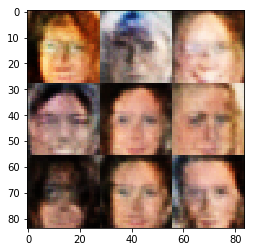

Epoch 0/1... Discriminator Loss: 1.2119... Generator Loss: 0.7094
Epoch 0/1... Discriminator Loss: 1.2602... Generator Loss: 0.9454
Epoch 0/1... Discriminator Loss: 1.3328... Generator Loss: 0.9139
Epoch 0/1... Discriminator Loss: 1.2737... Generator Loss: 0.7593
Epoch 0/1... Discriminator Loss: 1.3056... Generator Loss: 0.7599
Epoch 0/1... Discriminator Loss: 1.1898... Generator Loss: 0.7693
Epoch 0/1... Discriminator Loss: 1.3044... Generator Loss: 0.7320
Epoch 0/1... Discriminator Loss: 1.2431... Generator Loss: 0.5794
Epoch 0/1... Discriminator Loss: 1.2737... Generator Loss: 0.9299
Epoch 0/1... Discriminator Loss: 1.3143... Generator Loss: 0.8412


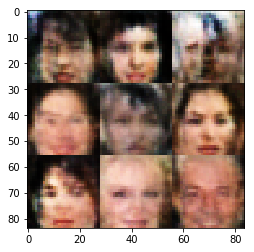

Epoch 0/1... Discriminator Loss: 1.1505... Generator Loss: 0.8211
Epoch 0/1... Discriminator Loss: 1.4214... Generator Loss: 0.7387
Epoch 0/1... Discriminator Loss: 1.2233... Generator Loss: 0.8240
Epoch 0/1... Discriminator Loss: 1.2485... Generator Loss: 0.7906
Epoch 0/1... Discriminator Loss: 1.2227... Generator Loss: 0.7347
Epoch 0/1... Discriminator Loss: 1.1948... Generator Loss: 0.7513
Epoch 0/1... Discriminator Loss: 1.3685... Generator Loss: 0.6924
Epoch 0/1... Discriminator Loss: 1.3279... Generator Loss: 0.7150
Epoch 0/1... Discriminator Loss: 1.2755... Generator Loss: 0.8610
Epoch 0/1... Discriminator Loss: 1.3015... Generator Loss: 0.6506


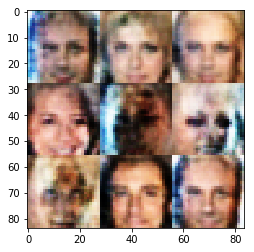

Epoch 0/1... Discriminator Loss: 1.1868... Generator Loss: 0.8556
Epoch 0/1... Discriminator Loss: 1.2827... Generator Loss: 0.7612
Epoch 0/1... Discriminator Loss: 1.1482... Generator Loss: 0.7498
Epoch 0/1... Discriminator Loss: 1.3796... Generator Loss: 0.7726
Epoch 0/1... Discriminator Loss: 1.2410... Generator Loss: 0.7015
Epoch 0/1... Discriminator Loss: 1.2745... Generator Loss: 0.7547
Epoch 0/1... Discriminator Loss: 1.1965... Generator Loss: 0.7738
Epoch 0/1... Discriminator Loss: 1.1493... Generator Loss: 0.7840
Epoch 0/1... Discriminator Loss: 1.1250... Generator Loss: 0.9529
Epoch 0/1... Discriminator Loss: 1.2687... Generator Loss: 0.8887


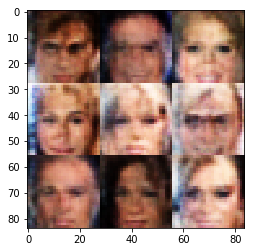

Epoch 0/1... Discriminator Loss: 1.1939... Generator Loss: 0.8763
Epoch 0/1... Discriminator Loss: 1.2286... Generator Loss: 0.7315
Epoch 0/1... Discriminator Loss: 1.2547... Generator Loss: 0.9539
Epoch 0/1... Discriminator Loss: 1.3166... Generator Loss: 0.6671
Epoch 0/1... Discriminator Loss: 1.2731... Generator Loss: 1.1688
Epoch 0/1... Discriminator Loss: 1.2275... Generator Loss: 0.8188
Epoch 0/1... Discriminator Loss: 1.3482... Generator Loss: 0.4884
Epoch 0/1... Discriminator Loss: 1.2553... Generator Loss: 0.8896
Epoch 0/1... Discriminator Loss: 1.2119... Generator Loss: 0.7628
Epoch 0/1... Discriminator Loss: 1.3556... Generator Loss: 0.7692


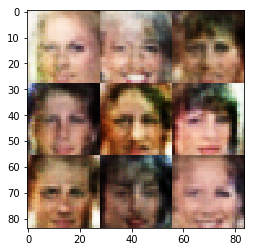

Epoch 0/1... Discriminator Loss: 1.0276... Generator Loss: 0.8541
Epoch 0/1... Discriminator Loss: 1.3841... Generator Loss: 0.7199
Epoch 0/1... Discriminator Loss: 1.2934... Generator Loss: 0.8399
Epoch 0/1... Discriminator Loss: 1.1993... Generator Loss: 0.7371
Epoch 0/1... Discriminator Loss: 1.4288... Generator Loss: 0.9286
Epoch 0/1... Discriminator Loss: 1.2574... Generator Loss: 0.7310
Epoch 0/1... Discriminator Loss: 1.3049... Generator Loss: 0.9941
Epoch 0/1... Discriminator Loss: 1.0589... Generator Loss: 0.9333
Epoch 0/1... Discriminator Loss: 1.2270... Generator Loss: 0.7692
Epoch 0/1... Discriminator Loss: 1.2483... Generator Loss: 0.6662


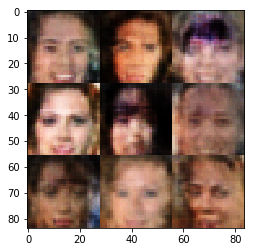

Epoch 0/1... Discriminator Loss: 1.2945... Generator Loss: 0.8194
Epoch 0/1... Discriminator Loss: 1.3055... Generator Loss: 0.7723
Epoch 0/1... Discriminator Loss: 1.1864... Generator Loss: 0.8735
Epoch 0/1... Discriminator Loss: 1.0875... Generator Loss: 0.8780
Epoch 0/1... Discriminator Loss: 1.2613... Generator Loss: 0.7851
Epoch 0/1... Discriminator Loss: 1.1417... Generator Loss: 0.7284
Epoch 0/1... Discriminator Loss: 1.3154... Generator Loss: 0.8759
Epoch 0/1... Discriminator Loss: 1.1674... Generator Loss: 0.8140
Epoch 0/1... Discriminator Loss: 1.1480... Generator Loss: 0.7214
Epoch 0/1... Discriminator Loss: 1.2774... Generator Loss: 0.6961


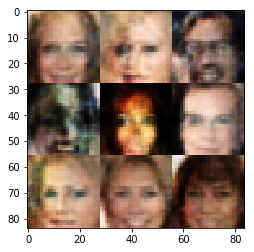

Epoch 0/1... Discriminator Loss: 1.3036... Generator Loss: 0.7590
Epoch 0/1... Discriminator Loss: 1.2988... Generator Loss: 0.8378
Epoch 0/1... Discriminator Loss: 1.2504... Generator Loss: 0.7168
Epoch 0/1... Discriminator Loss: 1.3034... Generator Loss: 0.9281
Epoch 0/1... Discriminator Loss: 1.2120... Generator Loss: 0.6795
Epoch 0/1... Discriminator Loss: 1.3451... Generator Loss: 0.6575
Epoch 0/1... Discriminator Loss: 1.1181... Generator Loss: 0.8615
Epoch 0/1... Discriminator Loss: 1.2487... Generator Loss: 0.7707
Epoch 0/1... Discriminator Loss: 1.2726... Generator Loss: 0.6984
Epoch 0/1... Discriminator Loss: 1.3532... Generator Loss: 0.9557


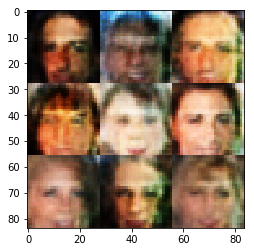

Epoch 0/1... Discriminator Loss: 1.3683... Generator Loss: 0.8021
Epoch 0/1... Discriminator Loss: 1.3458... Generator Loss: 0.6601
Epoch 0/1... Discriminator Loss: 1.3516... Generator Loss: 0.8378
Epoch 0/1... Discriminator Loss: 1.2514... Generator Loss: 0.7158
Epoch 0/1... Discriminator Loss: 1.2006... Generator Loss: 0.7856
Epoch 0/1... Discriminator Loss: 1.3162... Generator Loss: 0.7921
Epoch 0/1... Discriminator Loss: 1.3640... Generator Loss: 0.6733
Epoch 0/1... Discriminator Loss: 1.1956... Generator Loss: 0.7756
Epoch 0/1... Discriminator Loss: 1.1263... Generator Loss: 0.7655
Epoch 0/1... Discriminator Loss: 1.3471... Generator Loss: 0.8713


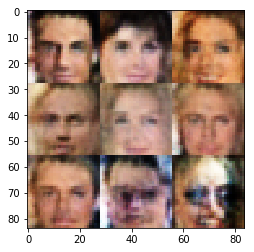

Epoch 0/1... Discriminator Loss: 1.1758... Generator Loss: 0.9496
Epoch 0/1... Discriminator Loss: 1.3399... Generator Loss: 0.7806
Epoch 0/1... Discriminator Loss: 1.1969... Generator Loss: 0.8668
Epoch 0/1... Discriminator Loss: 1.3043... Generator Loss: 0.8598
Epoch 0/1... Discriminator Loss: 1.3302... Generator Loss: 0.9180
Epoch 0/1... Discriminator Loss: 1.1223... Generator Loss: 0.8049
Epoch 0/1... Discriminator Loss: 1.3656... Generator Loss: 0.9180
Epoch 0/1... Discriminator Loss: 1.2574... Generator Loss: 0.7616
Epoch 0/1... Discriminator Loss: 1.3068... Generator Loss: 0.7544
Epoch 0/1... Discriminator Loss: 1.1606... Generator Loss: 0.9137


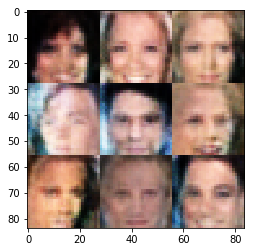

Epoch 0/1... Discriminator Loss: 1.3217... Generator Loss: 1.0412
Epoch 0/1... Discriminator Loss: 1.2295... Generator Loss: 0.9777
Epoch 0/1... Discriminator Loss: 1.1896... Generator Loss: 0.8126
Epoch 0/1... Discriminator Loss: 1.2480... Generator Loss: 0.7308
Epoch 0/1... Discriminator Loss: 1.1446... Generator Loss: 0.7812
Epoch 0/1... Discriminator Loss: 1.2597... Generator Loss: 0.8581
Epoch 0/1... Discriminator Loss: 1.1350... Generator Loss: 0.8426
Epoch 0/1... Discriminator Loss: 1.1858... Generator Loss: 0.8396
Epoch 0/1... Discriminator Loss: 1.2420... Generator Loss: 0.6935
Epoch 0/1... Discriminator Loss: 1.2345... Generator Loss: 0.6642


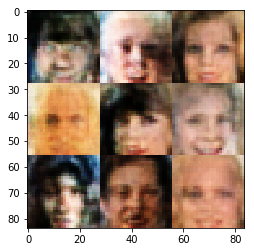

Epoch 0/1... Discriminator Loss: 1.3363... Generator Loss: 0.8241
Epoch 0/1... Discriminator Loss: 1.1503... Generator Loss: 0.7878
Epoch 0/1... Discriminator Loss: 1.2537... Generator Loss: 0.8033
Epoch 0/1... Discriminator Loss: 1.2622... Generator Loss: 0.9847
Epoch 0/1... Discriminator Loss: 1.2747... Generator Loss: 0.8065
Epoch 0/1... Discriminator Loss: 1.4806... Generator Loss: 0.5208
Epoch 0/1... Discriminator Loss: 1.3730... Generator Loss: 1.0390
Epoch 0/1... Discriminator Loss: 1.1235... Generator Loss: 0.7982
Epoch 0/1... Discriminator Loss: 1.1000... Generator Loss: 0.9061
Epoch 0/1... Discriminator Loss: 1.2682... Generator Loss: 0.7437


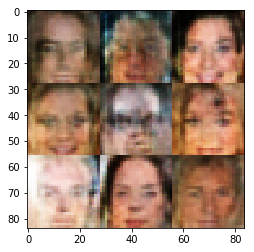

Epoch 0/1... Discriminator Loss: 1.3339... Generator Loss: 0.5771
Epoch 0/1... Discriminator Loss: 1.2065... Generator Loss: 0.7208
Epoch 0/1... Discriminator Loss: 1.3974... Generator Loss: 0.7478
Epoch 0/1... Discriminator Loss: 1.2588... Generator Loss: 0.8587
Epoch 0/1... Discriminator Loss: 1.2512... Generator Loss: 0.7728
Epoch 0/1... Discriminator Loss: 1.2501... Generator Loss: 0.7419
Epoch 0/1... Discriminator Loss: 1.2056... Generator Loss: 0.6670
Epoch 0/1... Discriminator Loss: 1.2279... Generator Loss: 0.8103
Epoch 0/1... Discriminator Loss: 1.2452... Generator Loss: 0.9423
Epoch 0/1... Discriminator Loss: 1.3221... Generator Loss: 0.6800


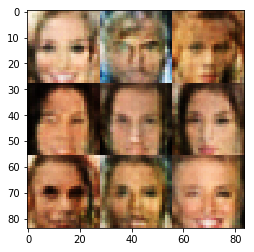

Epoch 0/1... Discriminator Loss: 1.2257... Generator Loss: 0.9175
Epoch 0/1... Discriminator Loss: 1.2856... Generator Loss: 0.8577
Epoch 0/1... Discriminator Loss: 1.2929... Generator Loss: 0.6577
Epoch 0/1... Discriminator Loss: 1.1989... Generator Loss: 0.6943
Epoch 0/1... Discriminator Loss: 1.2306... Generator Loss: 0.7363
Epoch 0/1... Discriminator Loss: 1.1880... Generator Loss: 0.8295
Epoch 0/1... Discriminator Loss: 1.2705... Generator Loss: 0.7769
Epoch 0/1... Discriminator Loss: 1.3051... Generator Loss: 0.6405
Epoch 0/1... Discriminator Loss: 1.3761... Generator Loss: 0.7446
Epoch 0/1... Discriminator Loss: 1.1301... Generator Loss: 0.7361


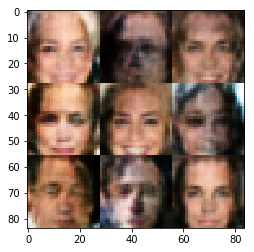

Epoch 0/1... Discriminator Loss: 1.1979... Generator Loss: 0.9912
Epoch 0/1... Discriminator Loss: 1.2505... Generator Loss: 0.7177
Epoch 0/1... Discriminator Loss: 1.2832... Generator Loss: 0.7628
Epoch 0/1... Discriminator Loss: 1.2151... Generator Loss: 0.9709
Epoch 0/1... Discriminator Loss: 1.3286... Generator Loss: 0.8997
Epoch 0/1... Discriminator Loss: 1.1797... Generator Loss: 0.8986
Epoch 0/1... Discriminator Loss: 1.2481... Generator Loss: 0.8503
Epoch 0/1... Discriminator Loss: 1.3183... Generator Loss: 0.8082
Epoch 0/1... Discriminator Loss: 1.1974... Generator Loss: 0.7242
Epoch 0/1... Discriminator Loss: 1.2815... Generator Loss: 0.7788


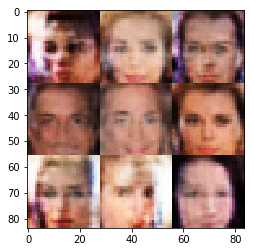

Epoch 0/1... Discriminator Loss: 1.2862... Generator Loss: 0.8440
Epoch 0/1... Discriminator Loss: 1.2931... Generator Loss: 0.8093
Epoch 0/1... Discriminator Loss: 1.2688... Generator Loss: 0.7405
Epoch 0/1... Discriminator Loss: 1.2891... Generator Loss: 0.7631
Epoch 0/1... Discriminator Loss: 1.2084... Generator Loss: 0.6919
Epoch 0/1... Discriminator Loss: 1.4191... Generator Loss: 0.6528
Epoch 0/1... Discriminator Loss: 1.2051... Generator Loss: 0.9120
Epoch 0/1... Discriminator Loss: 1.2727... Generator Loss: 0.7886
Epoch 0/1... Discriminator Loss: 1.1681... Generator Loss: 0.7239
Epoch 0/1... Discriminator Loss: 1.1888... Generator Loss: 0.8295


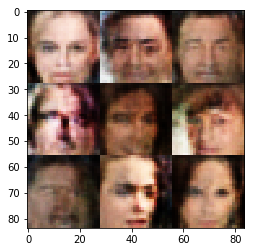

Epoch 0/1... Discriminator Loss: 1.1929... Generator Loss: 0.9215
Epoch 0/1... Discriminator Loss: 1.2643... Generator Loss: 1.0950
Epoch 0/1... Discriminator Loss: 1.4435... Generator Loss: 1.0164
Epoch 0/1... Discriminator Loss: 1.3370... Generator Loss: 0.7292
Epoch 0/1... Discriminator Loss: 1.2582... Generator Loss: 0.7560
Epoch 0/1... Discriminator Loss: 1.2286... Generator Loss: 0.6669
Epoch 0/1... Discriminator Loss: 1.2380... Generator Loss: 0.9118
Epoch 0/1... Discriminator Loss: 1.2610... Generator Loss: 0.7610
Epoch 0/1... Discriminator Loss: 1.1243... Generator Loss: 0.8304
Epoch 0/1... Discriminator Loss: 1.2679... Generator Loss: 0.8750


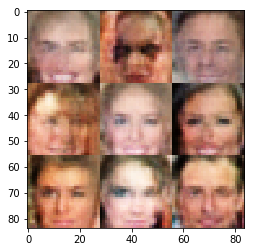

Epoch 0/1... Discriminator Loss: 1.1532... Generator Loss: 0.7927
Epoch 0/1... Discriminator Loss: 1.2579... Generator Loss: 0.6926
Epoch 0/1... Discriminator Loss: 1.3812... Generator Loss: 0.7963
Epoch 0/1... Discriminator Loss: 1.2660... Generator Loss: 0.7907
Epoch 0/1... Discriminator Loss: 1.1414... Generator Loss: 0.8088
Epoch 0/1... Discriminator Loss: 1.3116... Generator Loss: 0.6145
Epoch 0/1... Discriminator Loss: 1.3154... Generator Loss: 0.9349
Epoch 0/1... Discriminator Loss: 1.3171... Generator Loss: 0.8596
Epoch 0/1... Discriminator Loss: 1.2720... Generator Loss: 0.6758
Epoch 0/1... Discriminator Loss: 1.2800... Generator Loss: 0.6842


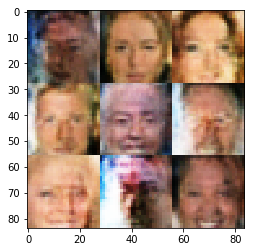

Epoch 0/1... Discriminator Loss: 1.3246... Generator Loss: 0.6055
Epoch 0/1... Discriminator Loss: 1.3870... Generator Loss: 0.5960
Epoch 0/1... Discriminator Loss: 1.2006... Generator Loss: 0.9383
Epoch 0/1... Discriminator Loss: 1.2311... Generator Loss: 0.9484
Epoch 0/1... Discriminator Loss: 1.2775... Generator Loss: 0.8268
Epoch 0/1... Discriminator Loss: 1.1854... Generator Loss: 0.9611
Epoch 0/1... Discriminator Loss: 1.2734... Generator Loss: 0.7179
Epoch 0/1... Discriminator Loss: 1.1920... Generator Loss: 0.8142
Epoch 0/1... Discriminator Loss: 1.3020... Generator Loss: 0.7496
Epoch 0/1... Discriminator Loss: 1.2473... Generator Loss: 0.7711


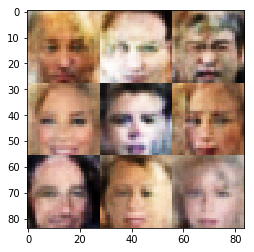

Epoch 0/1... Discriminator Loss: 1.2431... Generator Loss: 0.7154
Epoch 0/1... Discriminator Loss: 1.1516... Generator Loss: 0.8108
Epoch 0/1... Discriminator Loss: 1.3699... Generator Loss: 0.7158
Epoch 0/1... Discriminator Loss: 1.1302... Generator Loss: 0.9084
Epoch 0/1... Discriminator Loss: 1.1892... Generator Loss: 0.8005
Epoch 0/1... Discriminator Loss: 1.1146... Generator Loss: 0.8783
Epoch 0/1... Discriminator Loss: 1.2440... Generator Loss: 0.9106
Epoch 0/1... Discriminator Loss: 1.3107... Generator Loss: 0.7013
Epoch 0/1... Discriminator Loss: 1.3262... Generator Loss: 0.7793
Epoch 0/1... Discriminator Loss: 1.3666... Generator Loss: 0.6526


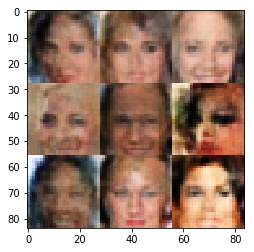

Epoch 0/1... Discriminator Loss: 1.1761... Generator Loss: 0.6329
Epoch 0/1... Discriminator Loss: 1.3088... Generator Loss: 0.6786
Epoch 0/1... Discriminator Loss: 1.2734... Generator Loss: 0.8565
Epoch 0/1... Discriminator Loss: 1.3387... Generator Loss: 0.7198
Epoch 0/1... Discriminator Loss: 1.2538... Generator Loss: 0.6421
Epoch 0/1... Discriminator Loss: 1.2357... Generator Loss: 0.8865
Epoch 0/1... Discriminator Loss: 1.1468... Generator Loss: 0.7979
Epoch 0/1... Discriminator Loss: 1.2889... Generator Loss: 0.7953
Epoch 0/1... Discriminator Loss: 1.1182... Generator Loss: 0.8507
Epoch 0/1... Discriminator Loss: 1.1608... Generator Loss: 0.7683


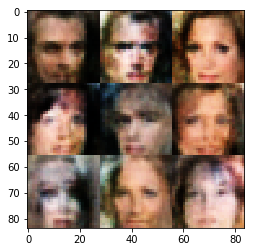

Epoch 0/1... Discriminator Loss: 1.0753... Generator Loss: 0.9348
Epoch 0/1... Discriminator Loss: 1.1564... Generator Loss: 0.7494
Epoch 0/1... Discriminator Loss: 1.1329... Generator Loss: 0.9708
Epoch 0/1... Discriminator Loss: 1.2546... Generator Loss: 0.6993
Epoch 0/1... Discriminator Loss: 1.2736... Generator Loss: 0.7311
Epoch 0/1... Discriminator Loss: 1.2259... Generator Loss: 0.8577
Epoch 0/1... Discriminator Loss: 1.1798... Generator Loss: 0.8887
Epoch 0/1... Discriminator Loss: 1.3290... Generator Loss: 0.7096
Epoch 0/1... Discriminator Loss: 1.2925... Generator Loss: 1.0146
Epoch 0/1... Discriminator Loss: 1.2573... Generator Loss: 0.8083


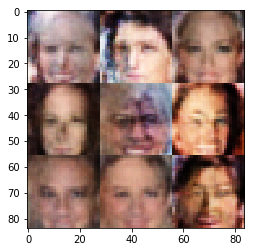

Epoch 0/1... Discriminator Loss: 1.1925... Generator Loss: 0.7994
Epoch 0/1... Discriminator Loss: 1.2957... Generator Loss: 0.7083
Epoch 0/1... Discriminator Loss: 1.1201... Generator Loss: 0.8350
Epoch 0/1... Discriminator Loss: 1.2850... Generator Loss: 0.7943
Epoch 0/1... Discriminator Loss: 1.2299... Generator Loss: 0.6645
Epoch 0/1... Discriminator Loss: 1.2786... Generator Loss: 0.9792
Epoch 0/1... Discriminator Loss: 1.1161... Generator Loss: 1.1033
Epoch 0/1... Discriminator Loss: 1.3066... Generator Loss: 0.7656
Epoch 0/1... Discriminator Loss: 1.1067... Generator Loss: 0.7130
Epoch 0/1... Discriminator Loss: 1.3994... Generator Loss: 0.9212


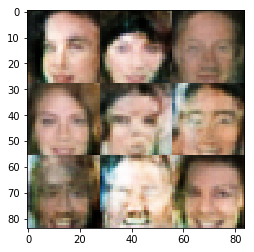

Epoch 0/1... Discriminator Loss: 1.3068... Generator Loss: 0.7771
Epoch 0/1... Discriminator Loss: 1.4058... Generator Loss: 0.7171
Epoch 0/1... Discriminator Loss: 1.2357... Generator Loss: 0.7911
Epoch 0/1... Discriminator Loss: 1.1768... Generator Loss: 0.7881
Epoch 0/1... Discriminator Loss: 1.3096... Generator Loss: 0.7298
Epoch 0/1... Discriminator Loss: 1.2712... Generator Loss: 0.8555
Epoch 0/1... Discriminator Loss: 1.1474... Generator Loss: 0.9894
Epoch 0/1... Discriminator Loss: 1.1450... Generator Loss: 0.9556
Epoch 0/1... Discriminator Loss: 1.1987... Generator Loss: 0.8472
Epoch 0/1... Discriminator Loss: 1.1336... Generator Loss: 0.7837


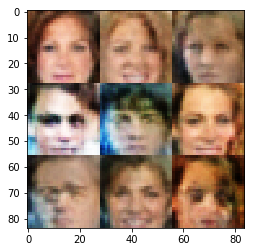

Epoch 0/1... Discriminator Loss: 1.1543... Generator Loss: 0.8468
Epoch 0/1... Discriminator Loss: 1.3274... Generator Loss: 0.6993
Epoch 0/1... Discriminator Loss: 1.1981... Generator Loss: 0.8128


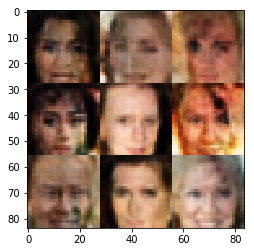

In [34]:
batch_size = 32
z_dim = 100
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Creating some images:

INFO:tensorflow:Restoring parameters from ./checkpoints/generator.ckpt


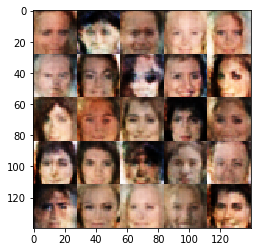

In [49]:
g = tf.Graph()
with g.as_default():
    data_shape = (None,28,28,3)
    inputs, z, lt = model_inputs(data_shape[1],data_shape[2],data_shape[3],z_dim)
    d_loss, g_loss = model_loss(inputs, z, data_shape[3])
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, lt, beta1)
    saver = tf.train.Saver()
    
with tf.Session(graph=g) as sess:
    # Restore variables from disk.
    saver.restore(sess, "./checkpoints/generator.ckpt")
    show_generator_output(sess, 25, z, 3, "RGB")

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.